# Exploratory Data Analysis

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '507e5c83-6b27-4c21-88b6-e05f6d10fe3f'
resource_group = 'scantron-mlpoc-rg'
workspace_name = 'scantron-mlpoc-ws'

workspace = Workspace(subscription_id, resource_group, workspace_name)

train_dataset = Dataset.get_by_name(workspace, name='train_dataset')
train_dataset = train_dataset.to_pandas_dataframe()

toyota_comments = Dataset.get_by_name(workspace, name='toyota_comments')
toyota_comments = toyota_comments.to_pandas_dataframe()

In [104]:
toyota_comments.to_csv('data.csv', index=False)

In [77]:
print(toyota_comments.shape)
toyota_comments.head()

(7315, 14)


,Tieback,Comment,CategoryCode,Category,SubCategoryCode,SubCategory,Coded CategoryCode,Category_1,Coded SubCategoryCode,SubCategory_1,ConditionCode,Condition Description,FinalCode,Hot Alert
0,57547163,S-E All the previous vehicles I've had turn on...,45,Gauges & Lights,7,Low fuel light,45,Gauges & Lights,7,Low fuel light,WC,"Would like to have, change, add feature, make ...",054507WC,False
1,57658128,"When I plug it in, the charging station shows ...",41,Engine,21,Electric/hybrid battery charging,41,Engine,21,Electric/hybrid battery charging,CR,Charging,054121CR,True
2,57644364,Cross bars should fold into the roof rails lik...,19,Exterior Body,12,Roof rack,19,Exterior Body,12,Roof rack,WC,"Would like to have, change, add feature, make ...",051912WC,True
3,57703546,Not sure this is park assist or pre collision ...,14,Interior Operation & Controls,27,Park assist,14,Interior Operation & Controls,27,Park assist,WC,"Would like to have, change, add feature, make ...",051427WC,True
4,57693044,Since the head unit in my 2020 Tacoma support ...,29,"Audio, Communication, Navigation System",99,Audio/Comm/Nav problem other than listed,29,"Audio, Communication, Navigation System",99,Audio/Comm/Nav problem other than listed,WC,"Would like to have, change, add feature, make ...",052999WC,True


In [71]:
toyota_comments.columns

Index(['Tieback', 'Comment', 'CategoryCode', 'Category', 'SubCategoryCode',
       'SubCategory', 'Coded CategoryCode', 'Category_1',
       'Coded SubCategoryCode', 'SubCategory_1', 'ConditionCode',
       'Condition Description', 'FinalCode', 'Hot Alert'],
      dtype='object')

In [111]:
toyota_comments.drop_duplicates(inplace=True)
toyota_comments

,Tieback,Comment,CategoryCode,Category,SubCategoryCode,SubCategory,Coded CategoryCode,Category_1,Coded SubCategoryCode,SubCategory_1,ConditionCode,Condition Description,FinalCode,Hot Alert
0,57547163,S-E All the previous vehicles I've had turn on...,45,Gauges & Lights,7,Low fuel light,45,Gauges & Lights,7,Low fuel light,WC,"Would like to have, change, add feature, make ...",054507WC,False
1,57658128,"When I plug it in, the charging station shows ...",41,Engine,21,Electric/hybrid battery charging,41,Engine,21,Electric/hybrid battery charging,CR,Charging,054121CR,True
2,57644364,Cross bars should fold into the roof rails lik...,19,Exterior Body,12,Roof rack,19,Exterior Body,12,Roof rack,WC,"Would like to have, change, add feature, make ...",051912WC,True
3,57703546,Not sure this is park assist or pre collision ...,14,Interior Operation & Controls,27,Park assist,14,Interior Operation & Controls,27,Park assist,WC,"Would like to have, change, add feature, make ...",051427WC,True
4,57693044,Since the head unit in my 2020 Tacoma support ...,29,"Audio, Communication, Navigation System",99,Audio/Comm/Nav problem other than listed,29,"Audio, Communication, Navigation System",99,Audio/Comm/Nav problem other than listed,WC,"Would like to have, change, add feature, make ...",052999WC,True
5,57542243,12V battery lost all charge due to some unknow...,41,Engine,1,Battery,41,Engine,1,Battery,IC,Inoperative,054101IC,True
6,57584692,I've discovered this vehicle does have remote ...,41,Engine,19,Remote engine start (RES),41,Engine,19,Remote engine start (RES),FB,"Features, options",054119FB,True
7,57465327,on occasion (six times in the 8 weeks I have t...,41,Engine,99,Engine problem other than listed,43,Transmssion,2,"Transmission noise(excessive, abnormal)",NC,"Noise-squeaks, rattles",054302NC,True
8,57627367,when my iPhone 11pro is plugged in and I make ...,29,"Audio, Communication, Navigation System",58,Apple CarPlay™/Android Auto™,29,"Audio, Communication, Navigation System",28,Bluetooth - phone calls,SL,Sound quality,052928SL,True
9,57590974,Driver's seat feels to me like the left side (...,26,Seats,99,Seat problem other than listed,26,Seats,92,Other - Seats (unspecified),FB,"Features, options",052692FB,True


## Explore top level classes: Category

There are 11 top level classes, and there's a 1:1 mapping between the category and category code

In [84]:
target1 = 'Category_1'
target2 = 'Coded CategoryCode'
num_classes1 = len(toyota_comments[target1].unique())
num_classes2 = len(toyota_comments[target2].unique())

print(num_classes1, num_classes2)

13 13


Below is the class distribution.  There is some inbalance, so we will need to perform class balancing.

In [85]:
class_counts = toyota_comments[target1].value_counts()
print(class_counts)

Audio, Communication, Navigation System    1442
Interior Operation & Controls              1253
Exterior Body                               992
Interior Fit and Appearance                 716
Seats                                       711
Engine                                      688
Handling & Steering                         430
Gauges & Lights                             315
Heating, Ventilation & Cooling              279
Transmssion                                 249
Brakes                                      173
NULL                                         40
Vehicle General                              27
Name: Category_1, dtype: int64


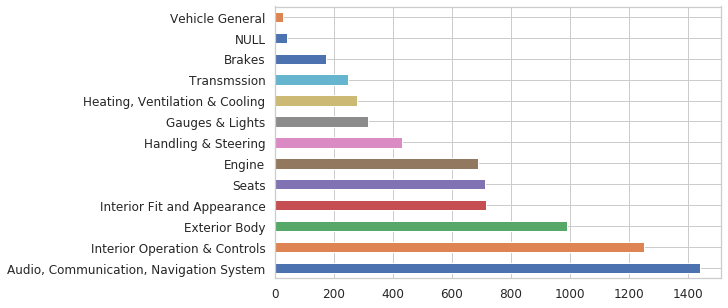

In [86]:
toyota_comments[target1].value_counts().plot(kind='barh')

## Explore second level classes: SubCategory Code

There is not a 1:1 mapping between SubCategory names and codes.  Which are we trying to predict? 
Recommendation is subcategory code, not name, as there are 64 classes and better (not great) class balance.  

In [97]:
target3 = 'SubCategory_1'
target4 = 'Coded SubCategoryCode'
num_classes3 = len(toyota_comments[target3].unique())
num_classes4 = len(toyota_comments[target4].unique())
print(num_classes3, num_classes4)

278 64


Below is the class distribution.  There is some inbalance, so we will need to perform class balancing and threshold based on counts.  We need to determine a threshold of number of acceptable instances - 50 should be a good start.

Subcategory names as target classes have too few training examples per class, so we should use subcategory codes.

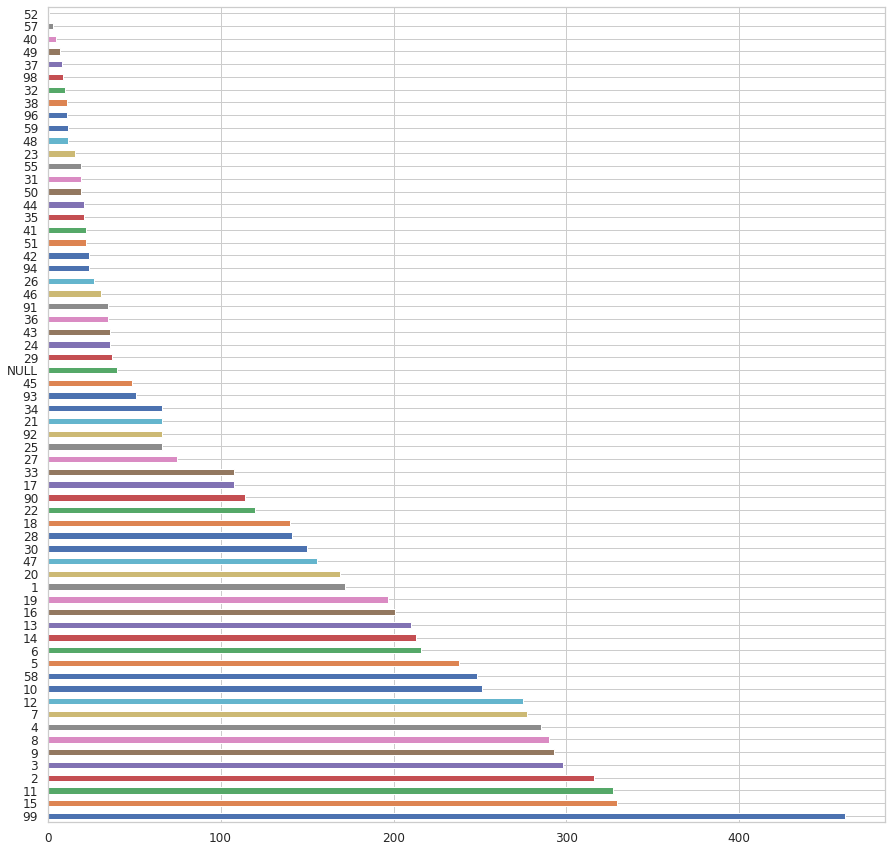

In [102]:
toyota_comments[target4].value_counts().plot(kind='barh', figsize=(15,15))

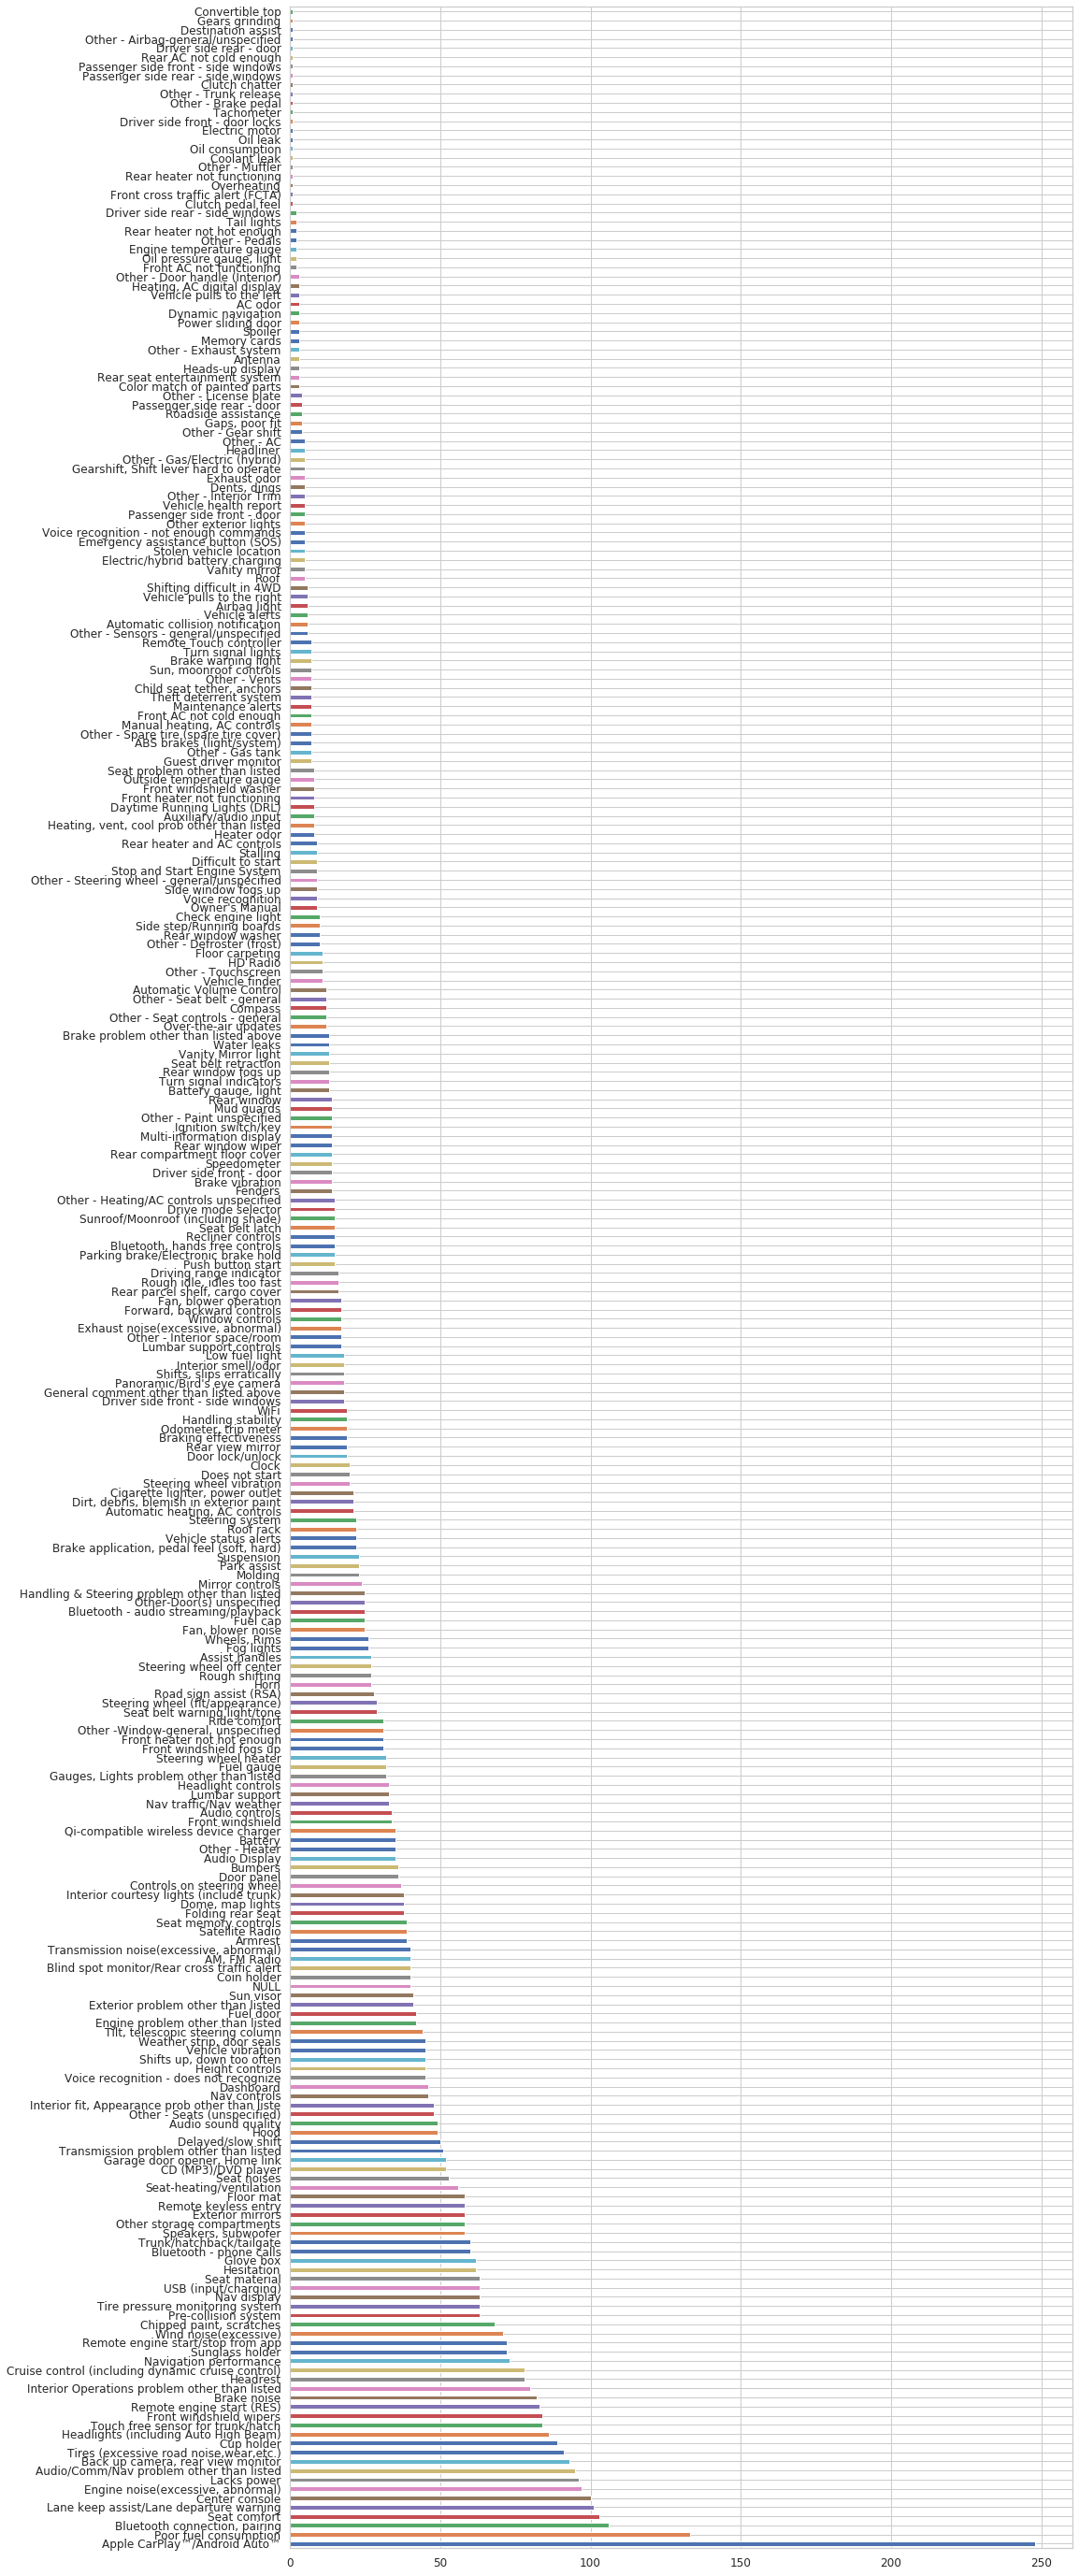

In [100]:
toyota_comments[target3].value_counts().plot(kind='barh', figsize=(15,50))

## Explore duplicates

In [139]:
duplicates = toyota_comments[toyota_comments.duplicated(subset=['Comment'], keep=False)]
duplicates

,Tieback,Comment,CategoryCode,Category,SubCategoryCode,SubCategory,Coded CategoryCode,Category_1,Coded SubCategoryCode,SubCategory_1,ConditionCode,Condition Description,FinalCode,Hot Alert
12,57695908,I am truly disappointed in Toyota I will not p...,29,"Audio, Communication, Navigation System",47,Remote engine start/stop from app,29,"Audio, Communication, Navigation System",47,Remote engine start/stop from app,ZZ,Unspecified,052947ZZ,False
14,57695908,I am truly disappointed in Toyota I will not p...,29,"Audio, Communication, Navigation System",47,Remote engine start/stop from app,NULL,NULL,NULL,NULL,NULL,NULL,0,False
17,57684815,"Started car on cold morning, turned heat up wh...",22,"Heating, Ventilation & Cooling",18,Front AC not functioning,22,"Heating, Ventilation & Cooling",16,Front heater not hot enough,AF,"Not hot enough, too hot",052216AF,True
18,57684815,"Started car on cold morning, turned heat up wh...",22,"Heating, Ventilation & Cooling",15,Front heater not functioning,22,"Heating, Ventilation & Cooling",15,Front heater not functioning,NF,"Not working properly, malfunction",052215NF,True
19,57684815,"Started car on cold morning, turned heat up wh...",22,"Heating, Ventilation & Cooling",19,Rear heater not functioning,22,"Heating, Ventilation & Cooling",19,Rear heater not functioning,NF,"Not working properly, malfunction",052219NF,True
20,57684815,"Started car on cold morning, turned heat up wh...",22,"Heating, Ventilation & Cooling",22,Rear AC not functioning,22,"Heating, Ventilation & Cooling",90,Other - Heater,NF,"Not working properly, malfunction",052290NF,True
22,57382958,I was driving in the snow and the tires kick t...,34,Handling & Steering,1,Handling stability,34,Handling & Steering,1,Handling stability,PA,Performance,053401PA,True
23,57382958,I was driving in the snow and the tires kick t...,34,Handling & Steering,1,Handling stability,NULL,NULL,NULL,NULL,NULL,NULL,9,True
24,57664219,When we purchased the car the dealership said ...,13,Interior Fit and Appearance,99,"Interior fit, Appearance prob other than liste",26,Seats,2,Seat material,AD,Appearance,052602AD,True
25,57676238,I hate it. It’s response to touch is way to sl...,29,"Audio, Communication, Navigation System",58,Apple CarPlay™/Android Auto™,29,"Audio, Communication, Navigation System",58,Apple CarPlay™/Android Auto™,PA,Performance,052958PA,True


In [140]:
unique_comments = duplicates['Comment'].unique()
len(unique_comments)

657

In [144]:
len(toyota_comments['Comment'].unique())

6523

In [142]:
count_multilabel_instances = 0
for comment in unique_comments:
    occurences = duplicates[duplicates['Comment']==comment]
    comment_classes = occurences['Category_1'].unique()
    if len(comment_classes) > 1:
        count_multilabel_instances += 1
#     print(len(comment_classes))
#     print(comment)
#     print(comment_classes)
print(count_multilabel_instances)

176


In [122]:
comment = unique_comments[1]
comment

'Started car on cold morning, turned heat up while car warmed up. When started driving, i thought the heater just worked really well but I started turning it down cause it was so hot. I touched the air vents to see and they were burning hot. I turned temp all the way down to “Lo” and it was still extremely hot. When I got to where I could stop, I turned car off then back on and it resolved itself.'

In [133]:
len(duplicates[duplicates['Comment']==comment]['Category_1'].unique())

1

In [134]:
occurences = duplicates[duplicates['Comment']==comment]
comment_classes = occurences['Category_1'].unique()

In [135]:
comment_classes

array(['Brakes'], dtype=object)

In [137]:
occurences

,Tieback,Comment,CategoryCode,Category,SubCategoryCode,SubCategory,Coded CategoryCode,Category_1,Coded SubCategoryCode,SubCategory_1,ConditionCode,Condition Description,FinalCode,Hot Alert
7313,57545480,Abs,14,Interior Operation & Controls,99,Interior Operations problem other than listed,36,Brakes,8,ABS brakes (light/system),ZZ,Unspecified,053608ZZ,False
